### Student Name : Stephen Boyle
#### Student ID : 24219151

### Import libraries & load data

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [193]:
# load bank.csv dataset
df = pd.read_csv('bank.csv')

# Task 1

## Helper Functions

In [194]:
# Function for univariate analysis in a grid format
def univariate_analysis_grid(df):
    analysis_results_numeric = []
    analysis_results_categorical = []

    for column in df.columns:
        column_analysis = {}
        column_analysis['Attribute'] = column

        # get type of column
        if pd.api.types.is_numeric_dtype(df[column]):
            # Numeric attribute analysis
            column_analysis['Type'] = 'Numeric'
            description = df[column].describe()
            column_analysis.update(description.to_dict())
            column_analysis['Skewness'] = df[column].skew()
            column_analysis['Kurtosis'] = df[column].kurtosis()
            column_analysis['Missing Values'] = df[column].isnull().sum()
            column_analysis['Missing Percentage'] = round(df[column].isnull().sum() / len(df) * 100, 1)

            analysis_results_numeric.append(column_analysis)

        elif pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == object:
            # Categorical attribute analysis
            column_analysis['Type'] = 'Categorical'
            description = df[column].describe()
            column_analysis.update(description.to_dict())
            column_analysis['Unique Categories'] = df[column].nunique()
            column_analysis['Missing Values'] = df[column].isnull().sum()
            column_analysis['Missing Percentage'] = round(df[column].isnull().sum() / len(df) * 100, 1)
            analysis_results_categorical.append(column_analysis)

        else:
            print(f'Attribute {column} is not numeric or categorical. Skipping...')
            continue

    analysis_numeric_df = pd.DataFrame(analysis_results_numeric)
    analysis_categorical_df = pd.DataFrame(analysis_results_categorical)
                                           
    return analysis_numeric_df, analysis_categorical_df

In [195]:
# Set plot styles
sns.set(style="whitegrid")

# Function for univariate analysis
def univariate_analysis(df, show_stats=True, show_plot=True):
    for column in df.columns:
        print(f'\n\nAnalyzing attribute: {column}')
        print('-' * 50)

        # drop subscribed column
        if column == 'subscribed':
            continue

        if pd.api.types.is_numeric_dtype(df[column]):

            if show_stats:
                # Numeric attribute analysis
                print('Type: Numeric\n')
                print(df[column].describe())
                print(f'Skewness: {df[column].skew():.2f}')
                print(f'Kurtosis: {df[column].kurtosis():.2f}')

                # print missing value as a percentage
                missing = df[column].isnull().sum()
                print(f'Missing Values: {missing} ({missing / len(df) * 100:.2f}%)')

            if show_plot:
                fig, axes = plt.subplots(1, 3, figsize=(18, 4))

                # Histogram
                sns.histplot(df[column].dropna(), kde=False, bins=30, ax=axes[0])
                axes[0].set_title(f'Histogram of {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[1])
                axes[1].set_title(f'Boxplot of {column}')

                # Density plot
                sns.kdeplot(df[column].dropna(), ax=axes[2], fill=True)
                axes[2].set_title(f'Density Plot of {column}')

                plt.tight_layout()
                plt.show()

        elif pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == object:
            
            if show_stats:
                # Categorical attribute analysis
                print('Type: Categorical\n')
                print(df[column].describe())
                print(f'Number of unique categories: {df[column].nunique()}')

                missing = df[column].isnull().sum()
                print(f'Missing Values: {missing} ({missing / len(df) * 100:.2f}%)')

            if show_plot:
                fig, axes = plt.subplots(1, 2, figsize=(14, 5))

                # Count plot
                sns.countplot(y=df[column], order=df[column].value_counts().index[:15], ax=axes[0])
                axes[0].set_title(f'Count plot of top categories in {column}')            

                # Pie chart
                top_categories = df[column].value_counts().nlargest(10)
                axes[1].pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140)
                axes[1].set_title(f'Pie Chart of top categories in {column}')

                plt.tight_layout()
                plt.show()

        else:
            print('Type: Unsupported or unknown attribute type.')

In [196]:
# plot the distribution of numerical columns against subscribed_num attribute
def plot_numerical_against_target(df, column_name):
    # plot the distribution of numerical columns against subscribed_num attribute
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # KDE plot
    sns.kdeplot(data=df, x=column_name, hue='subscribed', ax=axes[0], fill=True)
    axes[0].set_title(f'Distribution of {column_name} by subscribed')
    axes[0].set_xlabel(column_name)
    axes[0].set_ylabel('Density')

    # Boxplot
    sns.boxplot(data=df, x='subscribed', y=column_name, ax=axes[1])
    axes[1].set_title(f'Boxplot of {column_name} by subscribed')
    axes[1].set_xlabel('subscribed')
    axes[1].set_ylabel(column_name)

    plt.tight_layout()
    plt.show()

## Formulate an interesting question



Initial inspection of the data and accompanying data dictionary tells us that he data set may be broken out into 3 areas:
1. The type of person will contribute to whether they subscribe or not.   
2. The financial profile of the customer 
3. Finally the current and previous survey details describe how active the bank has been in marketing the products

I am going to perform basic analysis on all of the attributes but I will focus around the third item.  Specifically : 

*How has the bank's marketing engagement model impacted the subscription behaviour of the customer (positive or negative) and what features would make good candidate as drivers for model prediction.*


## Calculate statistics for the numerical and categorical attributes

### Target Classification Balance

The data below shows a perfect balanced split between yes & no classifications

In [197]:
print(df['subscribed'].value_counts())

subscribed
no     1000
yes    1000
Name: count, dtype: int64


### Numerical Statistics

In [198]:
analysis_numeric_df, analysis_categorical_df = univariate_analysis_grid(df)
display(analysis_numeric_df)

,Attribute,Type,count,mean,std,min,25%,50%,75%,max,Skewness,Kurtosis,Missing Values,Missing Percentage
0,age,Numeric,1988.0,41.753018,12.724358,18.0,32.00,38.0,50.0,93.0,0.853921,0.390934,12,0.6
1,balance,Numeric,2000.0,1413.663500,3131.224213,-980.0,201.50,551.0,1644.5,81204.0,11.461564,231.856074,0,0.0
2,day,Numeric,2000.0,13.851500,9.712189,1.0,5.00,12.0,23.0,31.0,0.403661,-1.285034,0,0.0
3,duration,Numeric,2000.0,292.020500,221.557295,7.0,146.00,236.0,379.0,1823.0,2.045787,6.297587,0,0.0
4,campaign,Numeric,2000.0,1.909500,1.378862,1.0,1.00,1.0,2.0,11.0,2.320856,7.162811,0,0.0
5,pdays,Numeric,2000.0,167.896000,131.754126,-1.0,75.75,182.0,251.0,854.0,0.920006,2.710735,0,0.0
6,previous,Numeric,2000.0,2.561500,3.400735,0.0,1.00,2.0,3.0,55.0,5.461168,59.746704,0,0.0


#### Analysis
**Distribution, Skewness (asymmetry) & Kurtosis (reliance on outliers)**
* Several features, like "balance," "duration," and "previous," show high skewness and kurtosis, indicating outliers and non-normal distributions.
* Specifically, "balance" is highly skewed, suggesting the presence of extreme values, while "previous" also shows significant right-skew. 
* Variables like "day" have relatively low skewness and kurtosis, indicating a more symmetric distribution. 
* "Campaign" and "pdays" show moderate skew and kurtosis. Overall, normalization or transformation may be necessary for some features, and special handling of outliers may improve model performance. This table offers a useful snapshot to guide preprocessing and modeling strategies.

**Missing Values**
* Age has a very minor amount of missing data which can be replaced with the median age
* pdays has no missing values, but we know that -1 means not previously contacted.  We may want to capture this in a new attribute (previously contacted: True/False)


### Categorical Statistics

In [199]:
analysis_numeric_df, analysis_categorical_df = univariate_analysis_grid(df)
display(analysis_categorical_df)

,Attribute,Type,count,unique,top,freq,Unique Categories,Missing Values,Missing Percentage
0,job,Categorical,1990,11,management,461,11,10,0.5
1,marital,Categorical,2000,3,married,1111,3,0,0.0
2,education,Categorical,1896,3,secondary,995,3,104,5.2
3,default,Categorical,2000,2,no,1985,2,0,0.0
4,housing,Categorical,2000,2,no,1037,2,0,0.0
5,loan,Categorical,2000,2,no,1750,2,0,0.0
6,contact,Categorical,1809,2,cellular,1663,2,191,9.6
7,month,Categorical,2000,12,feb,404,12,0,0.0
8,poutcome,Categorical,1546,3,failure,955,3,454,22.7
9,subscribed,Categorical,2000,2,no,1000,2,0,0.0


#### Analysis
**Data Variablity**
* default has value 'no' for almost the entire dataset
* loan also has 'no' for over 85% of the data
* As previouly noted, target variable subscribed is almost exactly split down the middle which is good for classification modelling purposes

**Missing Values**
* poutcome - has a 23% ratio of missing values.  Although this is a large percentage of missing data and a potential candidate for dropping, I am inclined to leave it and add a new unknown category to handle the missing data.
* contact - 10% missing values.  We will also likely add a category called 'unknown' to the current cellular or telephone
* education & job - 5% & 0.5% missing respectively, also substitute with new unknown category



# Plotting Numerical Distributions

--------------------------------------------------------------------
### day

,Attribute,Type,count,mean,std,min,25%,50%,75%,max,Skewness,Kurtosis,Missing Values,Missing Percentage
0,day,Numeric,2000.0,13.8515,9.712189,1.0,5.0,12.0,23.0,31.0,0.403661,-1.285034,0,0.0




Analyzing attribute: day
--------------------------------------------------


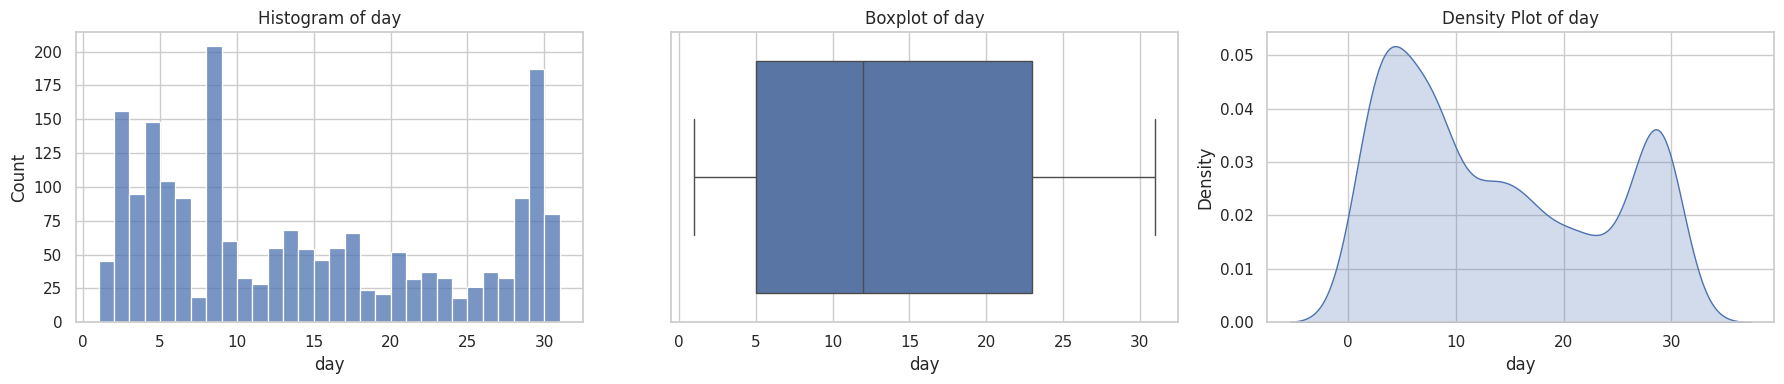



Analyzing attribute: subscribed
--------------------------------------------------


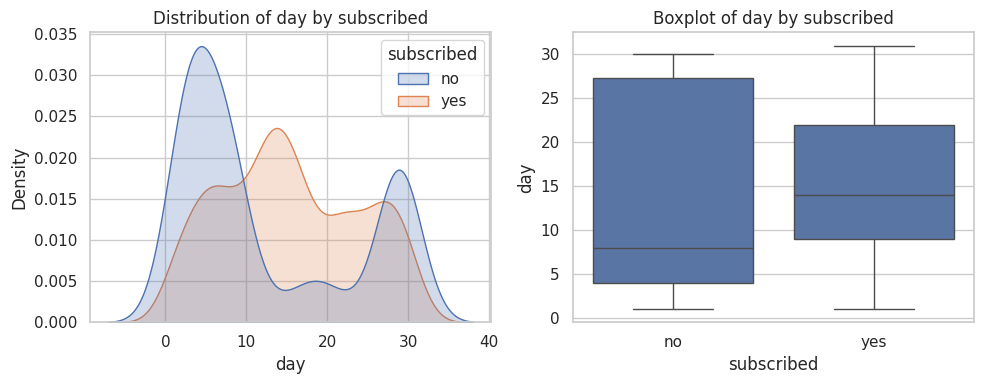

In [200]:
df_day = df[['day', 'subscribed']].copy()
analysis_numeric_df, analysis_categorical_df = univariate_analysis_grid(df_day)
display(analysis_numeric_df)
univariate_analysis(df_day, show_stats=False)
plot_numerical_against_target(df_day, 'day')

#### Observations
* The histogram and density plot show a bimodal distribution, with peaks around days 5–10 and days 25–30, suggesting calls tend to cluster in the early and late parts of the month.
* The boxplot for day shows a roughly symmetric distribution with a slightly tighter interquartile range (IQR) compared to the age attribute.
* From the distribution by subscribed, both subscribed and non-subscribed groups show activity throughout the month, but the subscribed group has a more uniform distribution with a slight peak in the middle of the month (days 10–20).
* The boxplot comparison reveals that those who subscribed were more likely contacted mid-month, whereas non-subscribers were contacted either earlier or later, consistent with the bimodal peak seen for the 'no' group.
* There are no significant outliers detected in the boxplots for either group, indicating call days are fairly bounded.

#### Conclusion
* The day of the month when a customer is contacted may influence the likelihood of subscription.
* Mid-month contact appears slightly more effective, as indicated by the shift in the distribution for the subscribed group.
* The bimodal call pattern for the 'no' group may reflect operational or campaign scheduling rather than customer preference—and might be less effective.
* Overall, while day of contact is not a strong predictor alone, it could interact with other features

#### Next Steps
* Explore interactions between day and month to see if certain times in the calendar 


-------------------------------------------------
### pdays

,Attribute,Type,count,mean,std,min,25%,50%,75%,max,Skewness,Kurtosis,Missing Values,Missing Percentage
0,pdays,Numeric,1546.0,217.494179,107.778607,1.0,177.0,199.0,261.0,854.0,1.827474,7.050294,0,0.0




Analyzing attribute: pdays
--------------------------------------------------


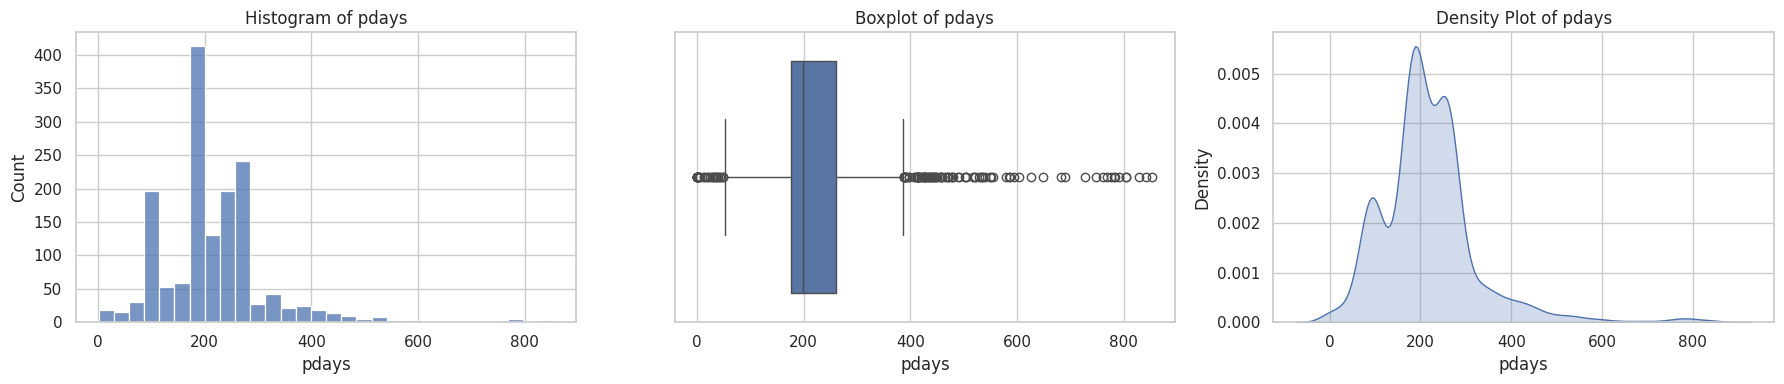



Analyzing attribute: subscribed
--------------------------------------------------


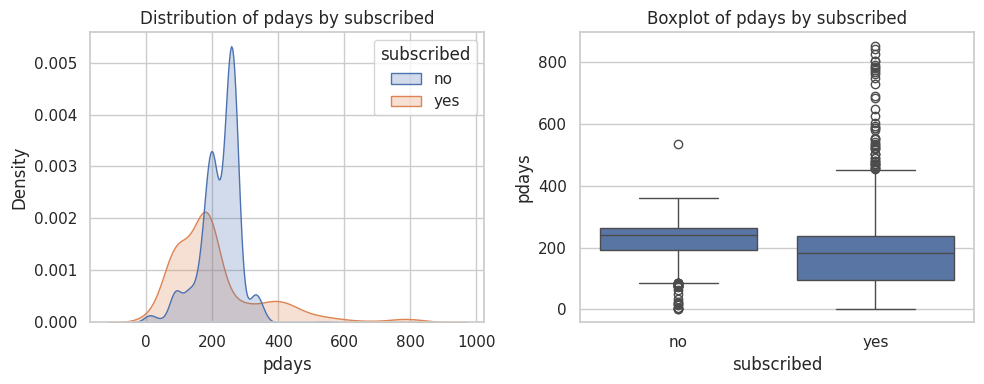

In [201]:
df_pdays = df[['pdays', 'subscribed']].copy()

# drop the min value of pdays
df_pdays = df_pdays[df_pdays['pdays'] != -1]


analysis_numeric_df, analysis_categorical_df = univariate_analysis_grid(df_pdays)
display(analysis_numeric_df)
univariate_analysis(df_pdays, show_stats=False)
plot_numerical_against_target(df_pdays, 'pdays')

-------------------------------------------------
### previous

,Attribute,Type,count,mean,std,min,25%,50%,75%,max,Skewness,Kurtosis,Missing Values,Missing Percentage
0,previous,Numeric,2000.0,2.5615,3.400735,0.0,1.0,2.0,3.0,55.0,5.461168,59.746704,0,0.0




Analyzing attribute: previous
--------------------------------------------------


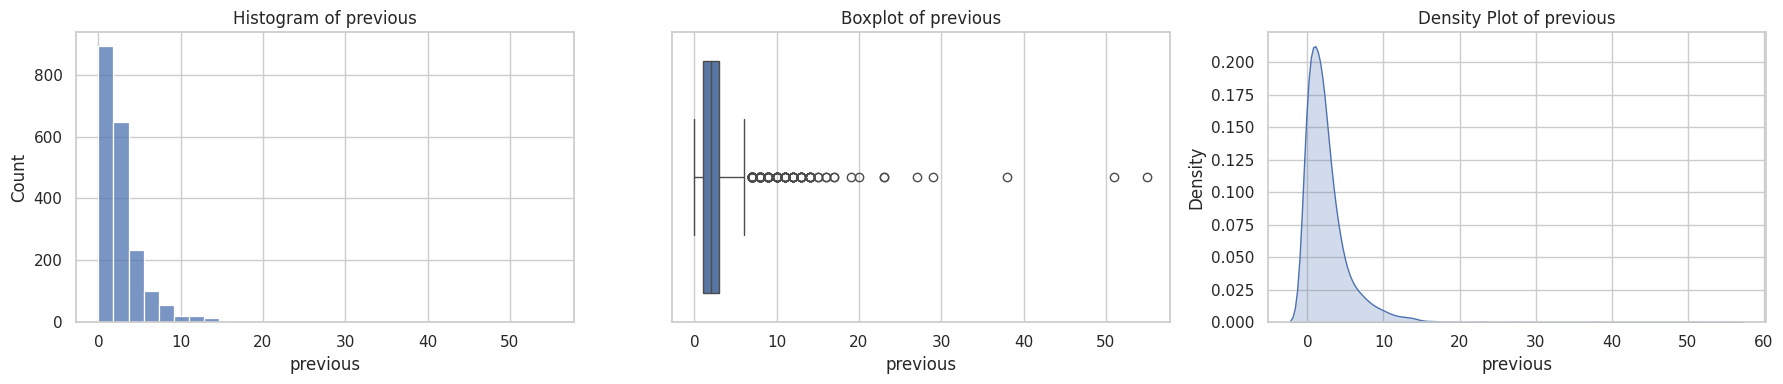



Analyzing attribute: subscribed
--------------------------------------------------


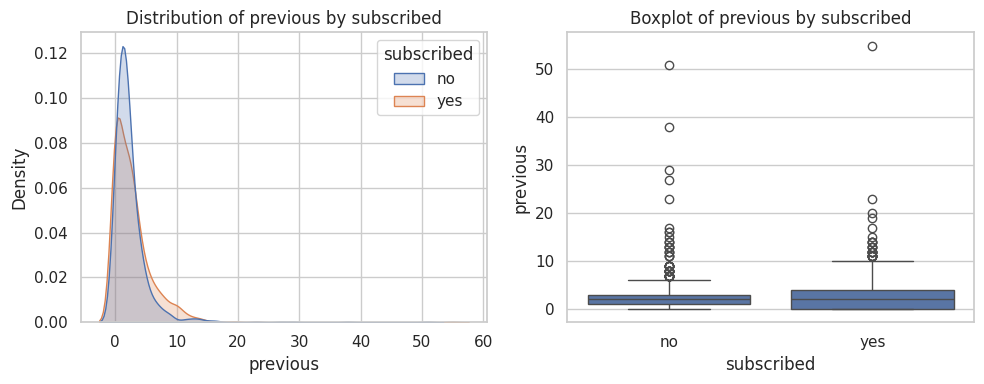

In [202]:


df_previous = df[['previous', 'subscribed']].copy()

analysis_numeric_df, analysis_categorical_df = univariate_analysis_grid(df_previous)
display(analysis_numeric_df)
univariate_analysis(df_previous, show_stats=False)
plot_numerical_against_target(df_previous, 'previous')

#### Observations
* The histogram and density plot both show a highly right-skewed distribution, with most values tightly clustered around 0 to 5 and a long tail reaching up to 55.
* The boxplot clearly indicates the presence of many outliers
* From the distribution plot by subscribed, we see that the shape of the distribution is similar for both groups, but the 'yes' group maintains slightly more density beyond 1–2 contacts
* The boxplot by subscription outcome shows that the 'yes' group has a slightly broader IQR 
* Despite the skew, the presence of previous contacts does seem to positively correlate with subscription—especially when compared to customers with zero prior interactions.

#### Conclusion
* The extreme values (20+ previous contacts) are rare and do not show a clear increase in conversions
* A lack of previous contact (0) could be of significance similar to pdays = -1

#### Next Steps
* Consider binning or transforming the previous feature (e.g., 0, 1–2, 3–5, 6+) 
* Investigate the relationship with other campaign-based attributes
* Explore interactions between previous, pdays, and campaign to identify optimal re-engagement timing and cadence.


#### Note!
We are given the guidance that a -1 value indicates that the customer has not been previously contacted.  As a result, in order to perform numerical univariate EDA I have dropped the instances where it is -1.  I am not planning to drop these values (row dropping) in the final output, merely to help this part of the analysis.  I will also create a new feature called 'not previously contacted Y/N' to account for this information.

#### Observations
* The histogram and density plot show a heavily right-skewed distribution, with most values clustered between 100 and 300 days, and a long tail extending past 800.
* The boxplot highlights a significant number of outliers on the higher end of the pdays scale.
* The distribution of pdays by subscribed shows some separation: the 'yes' group is more spread out, with broader variance, while the 'no' group is more concentrated.
* The boxplot by subscription confirms this difference, subscribed customers have a wider IQR and more high-value outliers, while the non-subscribed group is more tightly packed.
* The no boxplot shows outliers for lower values of pdays showing an inclination for people to say no if they have been contacted too recently since their last contact.

#### Conclusion
* Longer gaps between contacts may still lead to successful subscriptions, especially when previous contacts occurred far in the past.
* Customers with lower pdays (i.e., recently contacted) may be less likely to subscribe.


#### Next Steps
* Create new feature not previously contacted  
* Potentially split pdays into recent / older buckets to highlight the difference in subscribed.
* Investigate the relationship with other campaign-based attributes
* Consider building a time-aware feature, like "time since last successful contact" or "contact recency ratio," to capture more nuanced behavior.





# Combined distribution of attributes

### Compare against target variable - Subscribed

In [203]:
# Convert 'subscribed' to numeric
df['subscribed_num'] = df['subscribed'].map({'no': 0, 'yes': 1})
df_num = df.select_dtypes(include = [np.number])

# list the correlation of all columns with the target column
print(df_num.corr()['subscribed_num'].sort_values(ascending = False))

subscribed_num    1.000000
duration          0.385209
day               0.153196
balance           0.150395
age               0.085983
previous          0.058678
campaign         -0.034457
pdays            -0.132887
Name: subscribed_num, dtype: float64


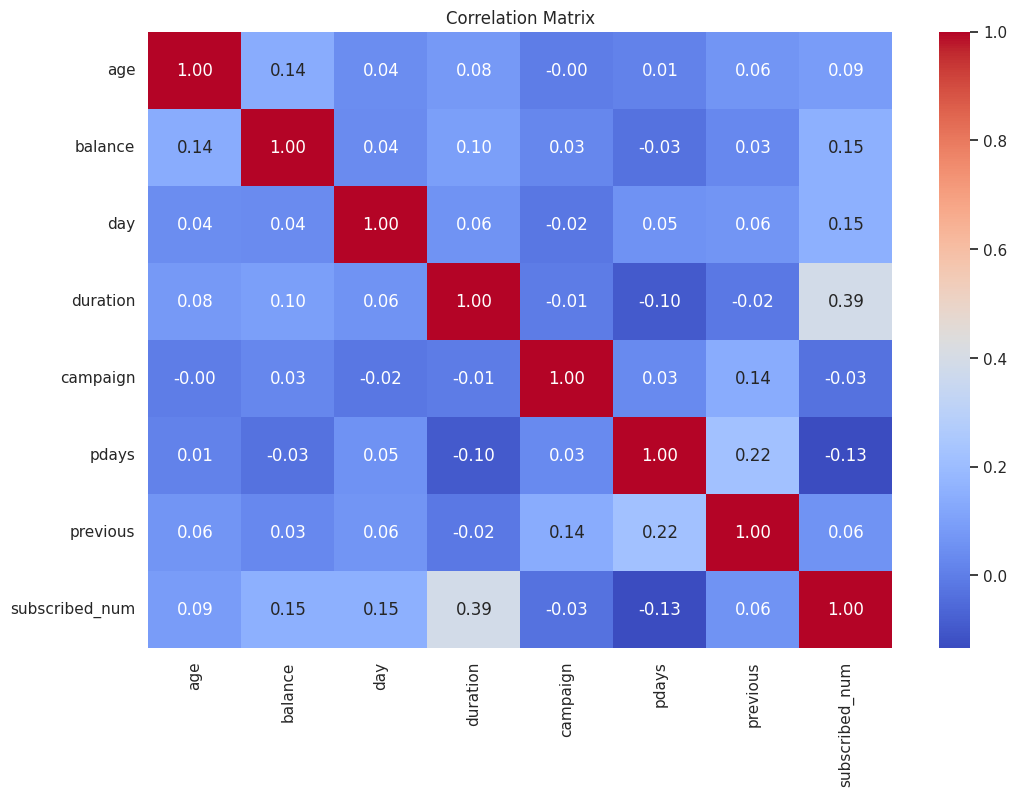

In [204]:
# plot a correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### Analysis
* duration has the strongest positive correlation with subscribed_num (0.39).  It's a shame we can't use it as directed by the supporting material, we won't know the value of duration in advance of prediction.
* balance, day, and age show weak positive correlations (≈ 0.09–0.15) – slight tendency for higher balances, specific days, or older clients to subscribe.
* pdays is weakly negatively correlated with subscribed_num (-0.13) – suggests that longer time since last contact may reduce subscription chances. (something we will dive into later)
* Most input features are weakly correlated with each other 
* previous and pdays have moderate correlation (0.22) – may reflect patterns in repeated or recent contact which we will also investigate.

### Comparing Campaign-based Attributes

#### Comparison of previous, pdays and campaign

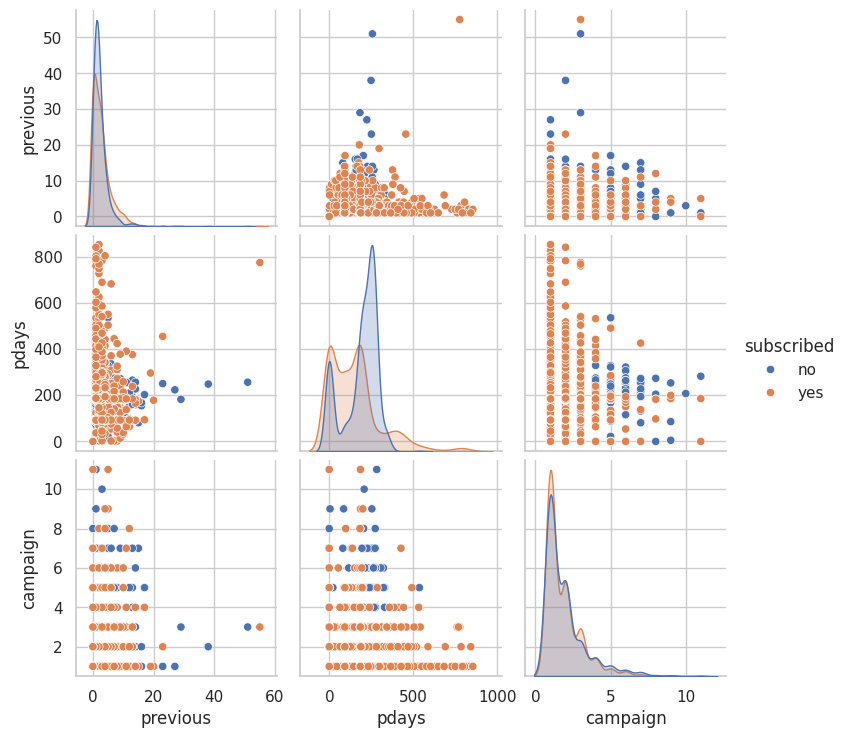

In [205]:
df_previous_pdays_campaign = df[['previous', 'pdays', 'campaign', 'subscribed']].copy()
sns.pairplot(df_previous_pdays_campaign, hue='subscribed', diag_kind='kde')
plt.show()

### Analysis
#### campaign vs previous
* The scatterplot shows that a customer has had high contact from a previous campaign or a current campaign but has not had high contact in both  (e.g. no one with 20+ contacts in previous and also 5+ contacts in current)
* Customers who have had low-to-moderate levels of contact in both the previous and current campaign are far more likely to subscribe (e.g. <10 in previous and <5 in current).  
* Customers who have had relatively high level of contact either in previous or current campaigns will have a higher proportion of 'no' values, indicationg posssible irritation at over-marketing.

#### Addition of pdays
* High pdays correlates with higher subscription likelihood (e.g. 400–800 range)
* Compared with both previous and campaign, an increase in either value (i.e. number of contacts) brings increasing levels of negative responses for pday values less than 400 days. 
* The conclusion here is that customers who were contacted recently (low pdays) are less likely to subscribe again. Letting more time pass appears beneficial.

### Compare with Month attribute

## Task 2

### Fill in missing values

In [206]:
# list the attribute name, missing total and missing percentage from the numeric analysis
print(analysis_numeric_df[['Attribute', 'Missing Values', 'Missing Percentage']])

  Attribute  Missing Values  Missing Percentage
0  previous               0                 0.0


#### Numeric Values
* As mentioned earlier, age has a very low amount of missing values which can be replaced with the median age
* pdays has no missing values per se, but -1 means that they weren't contacted previously.  We will create a new feature to handle this later on.

In [207]:
# fill missinga age values with the median age
df['age'] = df['age'].fillna(df['age'].median())
analysis_numeric_df, analysis_categorical_df = univariate_analysis_grid(df)

# confirm that the missing values for age have been filled
print(analysis_numeric_df[['Attribute', 'Missing Values', 'Missing Percentage']])


        Attribute  Missing Values  Missing Percentage
0             age               0                 0.0
1         balance               0                 0.0
2             day               0                 0.0
3        duration               0                 0.0
4        campaign               0                 0.0
5           pdays               0                 0.0
6        previous               0                 0.0
7  subscribed_num               0                 0.0


#### Categorical Values
We have a bigger job here, going throgh one by one:

In [208]:
# list the attribute name, missing total and missing percentage from the categorical analysis
print(analysis_categorical_df[['Attribute', 'Missing Values', 'Missing Percentage']])


    Attribute  Missing Values  Missing Percentage
0         job              10                 0.5
1     marital               0                 0.0
2   education             104                 5.2
3     default               0                 0.0
4     housing               0                 0.0
5        loan               0                 0.0
6     contact             191                 9.6
7       month               0                 0.0
8    poutcome             454                22.7
9  subscribed               0                 0.0


**Job**

There are two options here:  
* I could use mode to assign the most frequent value
* I could create a new 'unknown' category.  This category is  listed in the data dictionary so should be considered as a valid option. At this stage of the analysis, this seems the more intuitive, we don't know the job so we possibly don't want to make assumptions that would skew the data

In [209]:
# fill the missing job values with a new category called 'unknown'
df['job'] = df['job'].fillna('unknown')

**poutcome**

Note : The data dictionary lists the possible values as failure, nonexistent and success.  The data returns a slighly different result with 'other' inplace of 'nonexistent'


In [210]:
# list the unique values for poutcome and the total count of each value
print(df['poutcome'].value_counts())

poutcome
failure    955
success    444
other      147
Name: count, dtype: int64


My options here are to drop the column, add them to other, or create an 'unknown' category.  Despite the large number of missing values I think we should preserve the useful data.  

At this point I will create a new category of 'unknown' but will check how it tracks against 'other' and the target variable

In [211]:
# fill the missing poutcome values with a new category called 'unknown'
df['poutcome'] = df['poutcome'].fillna('unknown')


In [212]:
# list the unique values for contact and the total count of each value
print(df['contact'].value_counts())

contact
cellular     1663
telephone     146
Name: count, dtype: int64


In [213]:
# fill the missing contact values with a new category called 'unknown'
df['contact'] = df['contact'].fillna('unknown')

**education**

In [214]:
# list the unique values for education and the total count of each value
print(df['education'].value_counts())

education
secondary    995
tertiary     684
primary      217
Name: count, dtype: int64


5% missing values, will add an unknown category

In [215]:
# fill the missing education values with a new category called 'unknown'
df['education'] = df['education'].fillna('unknown')

### Encode categorical attributes
The categorical attributes fall into two encoding types, one-hot-encoding or binary

#### one hot encoding
attributes : job, marital, contact, poutcome 

In [216]:
# job'
job_dummies = pd.get_dummies(df['job'], prefix='job')
df = pd.concat([df, job_dummies], axis=1)
df.drop('job', axis=1, inplace=True)

# marital
marital_dummies = pd.get_dummies(df['marital'], prefix='marital')
df = pd.concat([df, marital_dummies], axis=1)
df.drop('marital', axis=1, inplace=True)

# contact
contact_dummies = pd.get_dummies(df['contact'], prefix='contact')
df = pd.concat([df, contact_dummies], axis=1)
df.drop('contact', axis=1, inplace=True)

# poutcome
poutcome_dummies = pd.get_dummies(df['poutcome'], prefix='poutcome')
df = pd.concat([df, poutcome_dummies], axis=1)
df.drop('poutcome', axis=1, inplace=True)




#### binary
attribuess : default, housing, loan, subscription

In [217]:
# default
df['default'] = df['default'].map({'yes': 1, 'no': 0})

# housing
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})

# loan
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})

# subscribed already encoded previously

### special cases : education, month
* one option was to hot encode but there is a natural progression up the level of education and also a relationship between the months / seasons that I would like to preserve

* for months I will assign each month a numeric value

* for education, it is a bit more complicated. my original temptation was to assign values to each level.  0 - unknown, 1 - primary, 2 - secondary, 3 - tertiary.  
However this implies 'no education' which isn't true.  After researching this a bit I came across a solution which is to create a new binary attribute called 'education_unknown' and another called 'education_level' which assigns a value of -1 to unknown (1, 2 and 3 to the rest) and dropping the original column

In [218]:
month_order = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
df['month'] = df['month'].map(month_order)

In [219]:
edu_order = {
    'unknown': -1,
    'primary': 1,
    'secondary': 2,
    'tertiary': 3
}

df['education_level'] = df['education'].map(edu_order)
df['education_unknown'] = (df['education'] == 'unknown').astype(int)

# Drop original column if desired
df.drop('education', axis=1, inplace=True)

### Handle outliers

Based mainly on the tutorial notebook here is my intented approach to handling outliers : 

| Attribute	| Analysis  | 	
| --------- | --------- |
| age	| Use IQR clipping |
| balance |	High outliers are realistic so log-transform	|
| day	| No outliers expected (1–31) so no action |
| duration	| Often skewed right → log-transform |
| campaign	| Clip extreme outliers using IQR	|
| pdays	| no action, will scale |
| previous	| Right-skewed with many zeros → log-transform	|


In [220]:
# age use IQR clipping
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['age'] = np.clip(df['age'], lower_bound, upper_bound)

# balance use log transform
df['balance'] = np.log(df['balance'] + abs(df['balance'].min()) + 1)

# duration use log transform
df['duration'] = np.log(df['duration'] + abs(df['duration'].min()) + 1)

# campaign use IQR clipping
Q1 = df['campaign'].quantile(0.25)
Q3 = df['campaign'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['campaign'] = np.clip(df['campaign'], lower_bound, upper_bound)

# previous use log transform
df['previous'] = np.log(df['previous'] + abs(df['previous'].min()) + 1)



### Handle skewed distributions & scaling

| Attribute	| Scaling Method	| Rationale |
| ----------| ----------| ----------|
| age | 	StandardScaler	| Age is roughly normal after clipping outliers.| 
| balance	| StandardScaler | 	Log-transformed to reduce skew, then standardized.| 
| day | 	MinMaxScaler	| Day ranges from 1–31 and benefits from compression.| 
| duration | 	StandardScaler	| Log reduces skew; StandardScaler normalizes scale.| 
| campaign | 	RobustScaler	| Slightly skewed and benefits from robust scaling.| 
| pdays | 	StandardScaler	| Wide range, including -1; standardization works well.| 
| previous | 	StandardScaler	|  Log-transformed to reduce right skew and normalize.| 

In [223]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# age use StandardScaler
df['age'] = StandardScaler().fit_transform(df[['age']])

# balance use standardScaler
df['balance'] = StandardScaler().fit_transform(df[['balance']])

# day minmax scaler
df['day'] = MinMaxScaler().fit_transform(df[['day']])

# duration use standardScaler
df['duration'] = StandardScaler().fit_transform(df[['duration']])

# campaign use robustScaler
df['campaign'] = RobustScaler().fit_transform(df[['campaign']])

# pdays use standardScaler
df['pdays'] = StandardScaler().fit_transform(df[['pdays']])

# previous use standardScaler
df['previous'] = StandardScaler().fit_transform(df[['previous']])



### New features

TODO : cyclical date info
add day of week
add other flag features

In [ ]:
# compare month attribute with 

### Conclusion

TODO : add conclusion